Movie Rating Prediction using ratings, users, genres and various other factors.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:

df_movies = pd.read_csv('IMDb_Movies_India.csv',encoding='ISO-8859-1')
df_movies.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df_movies.shape

(15509, 10)

***Data Pre_processing***

In [5]:
df_movies.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df_movies.dropna(inplace=True)
df_movies.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [7]:
# After data cleaning 
df_movies.isna().sum()


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [8]:
# checking for duplicate data
dup_data=df_movies.duplicated().any()
print("is there any duplicated values in data?",dup_data)

is there any duplicated values in data? False


In [9]:
# Remove parentheses from 'Year' column and convert to integer
df_movies['Year'] = df_movies['Year'].str.replace(r'[^\d]', '', regex=True).astype(int)
# Remove commas from 'Votes' column and convert to integer
df_movies['Votes'] = df_movies['Votes'].str.replace(',', '').astype(int)

# Remove 'min' from 'Duration' column and convert to integer
df_movies['Duration'] = df_movies['Duration'].str.replace('min', '').astype(int)


In [10]:
df_movies.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


# Exploring the dataset
Data Visualizations





In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

Text(0.5, 1.0, 'Number of Movies Per Year')

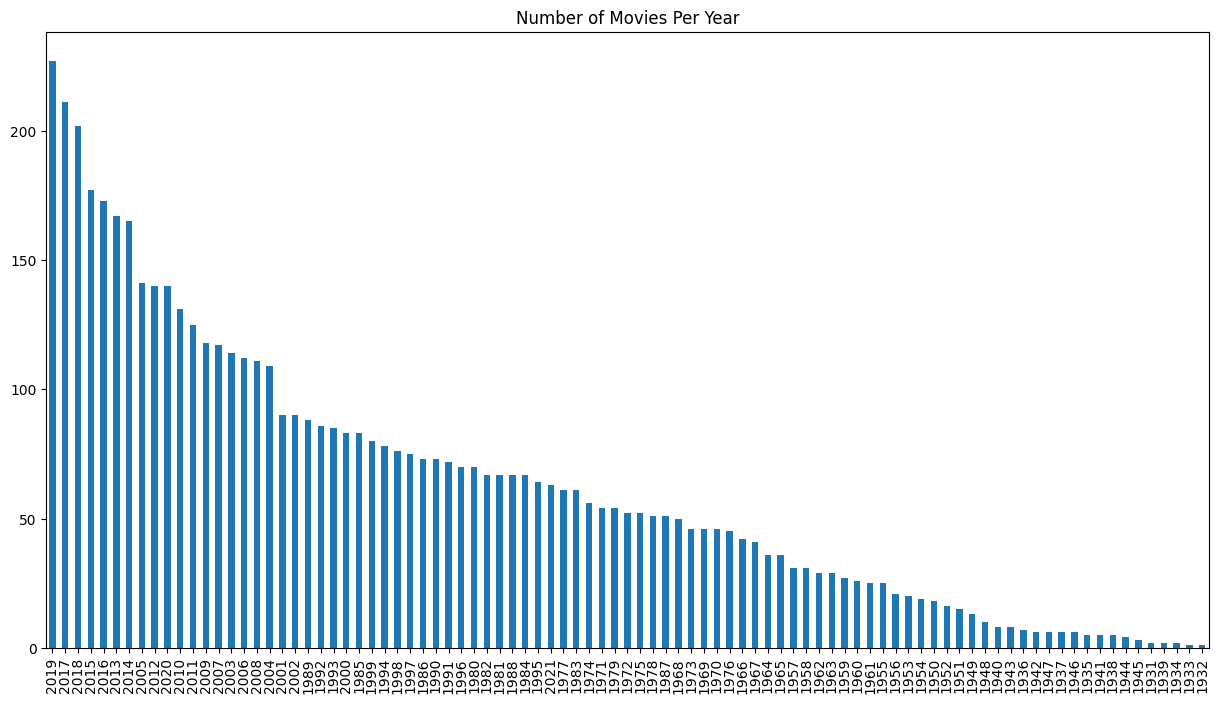

In [12]:
plt.figure(figsize=(15,8))
df_movies['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')

Text(0.5, 1.0, 'Number of rating Per Year')

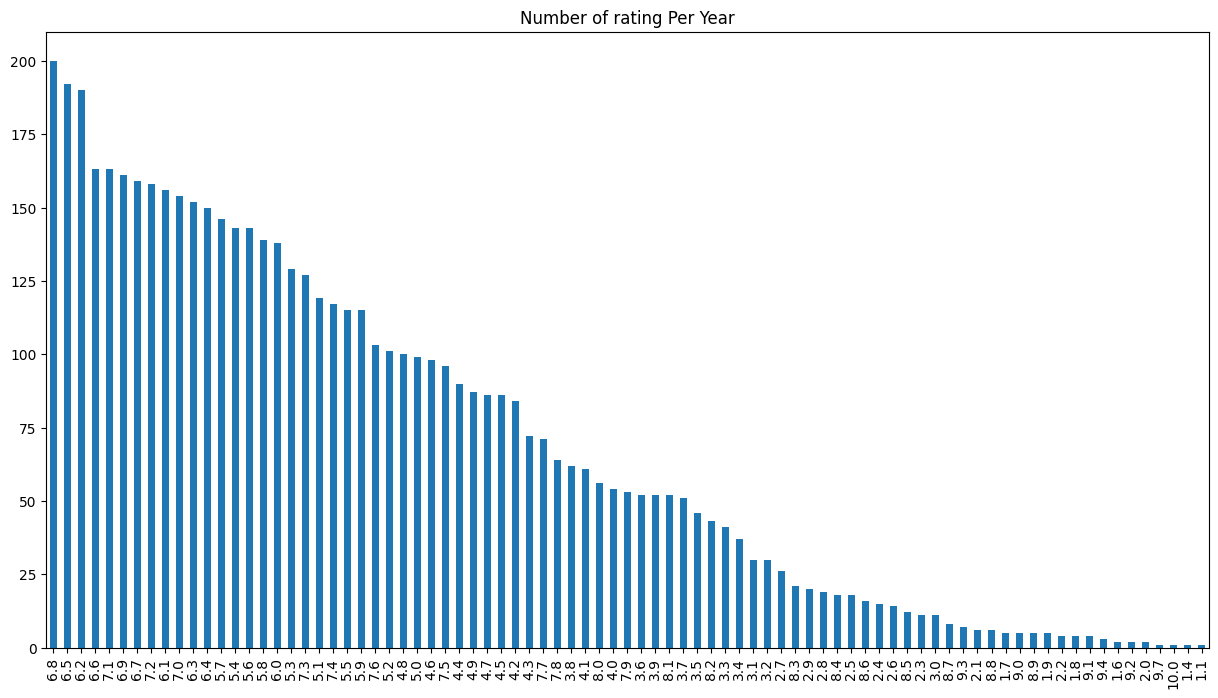

In [13]:
plt.figure(figsize=(15,8))
df_movies['Rating'].value_counts().plot(kind='bar')
plt.title('Number of rating Per Year')

Text(0.5, 1.0, 'Actor with Many Movies')

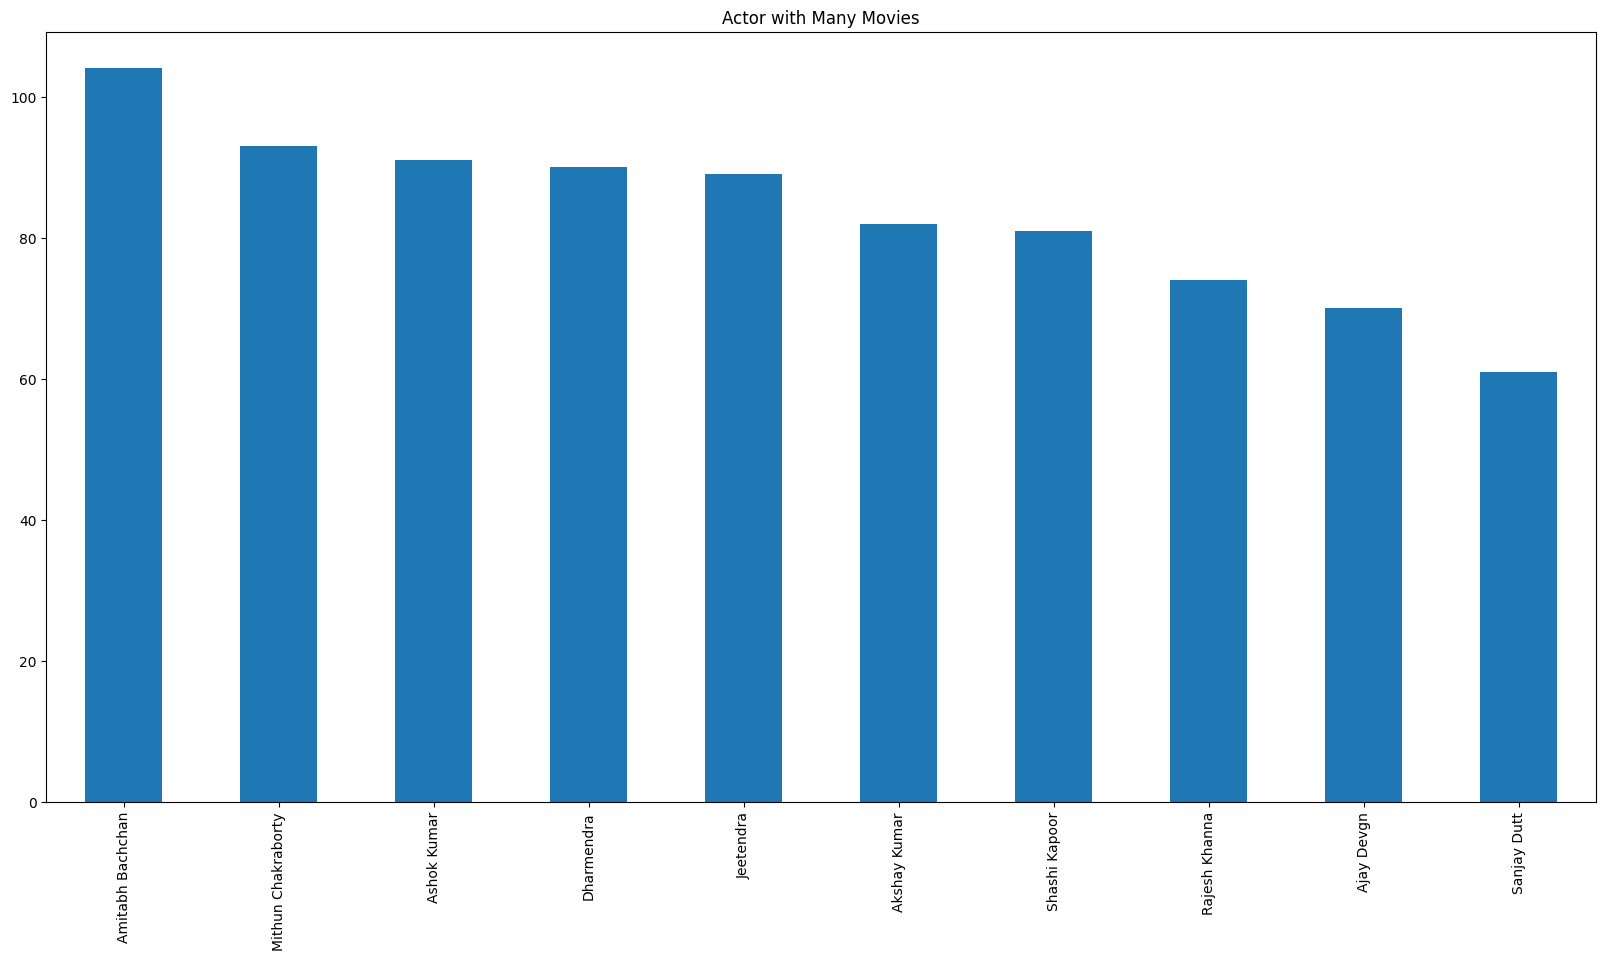

In [14]:
plt.figure(figsize=(20,10))
df_movies['Actor 1'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Actor with Many Movies')

Text(0.5, 1.0, 'Director with Many Movies')

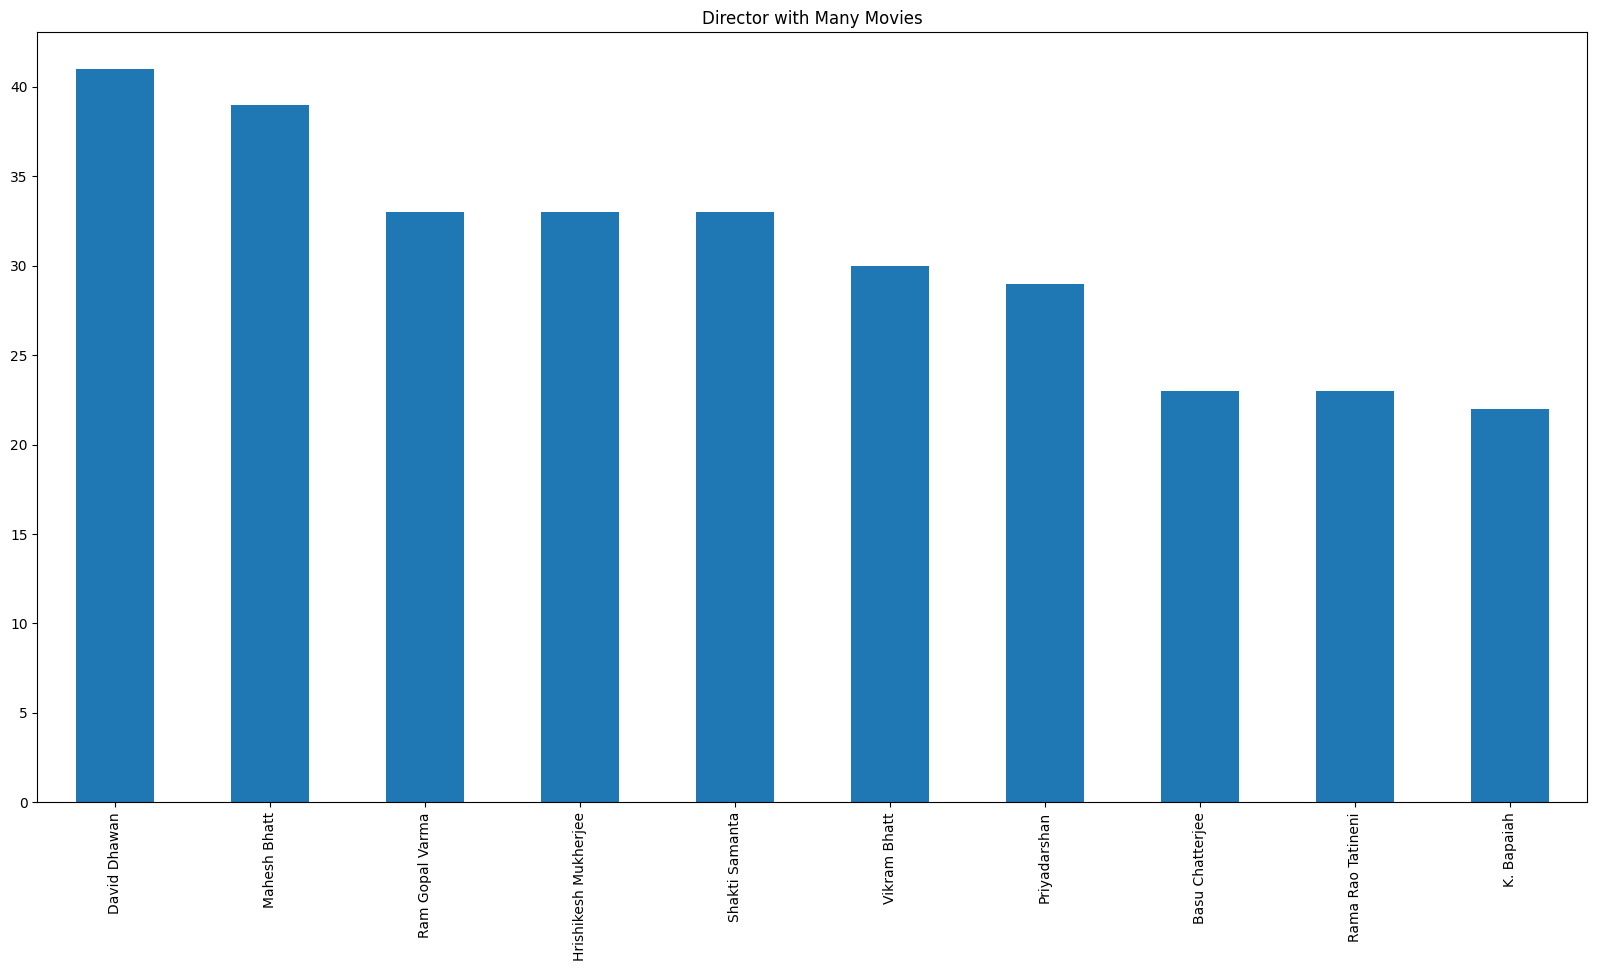

In [15]:
plt.figure(figsize=(20,10))
df_movies['Director'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Director with Many Movies')

Text(0.5, 1.0, 'Co-Actor(Actor 2) with Many Movies')

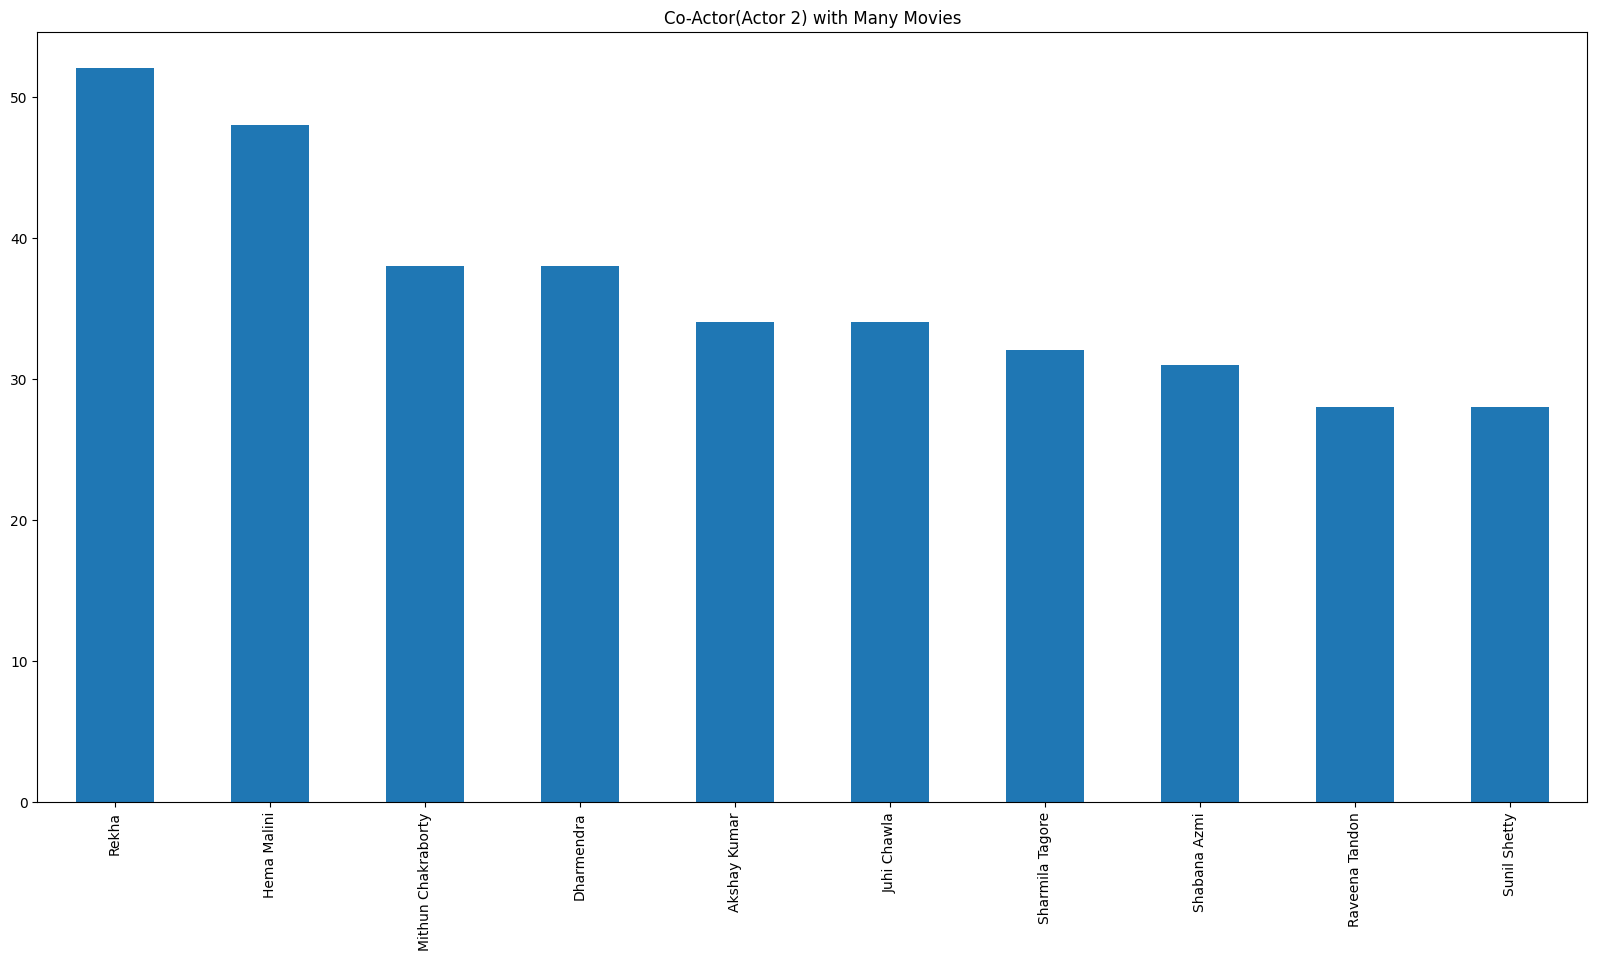

In [16]:
# Co-Actor with Many Movies 
plt.figure(figsize=(20,10))
df_movies['Actor 2'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Co-Actor(Actor 2) with Many Movies')

In [17]:
# using group by to get the unique values of the data
users = df_movies.groupby('Votes')
ratings = df_movies.groupby('Rating')
movies = df_movies.groupby('Name')
movies.first()
df_movies.head(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


<Figure size 1200x600 with 0 Axes>

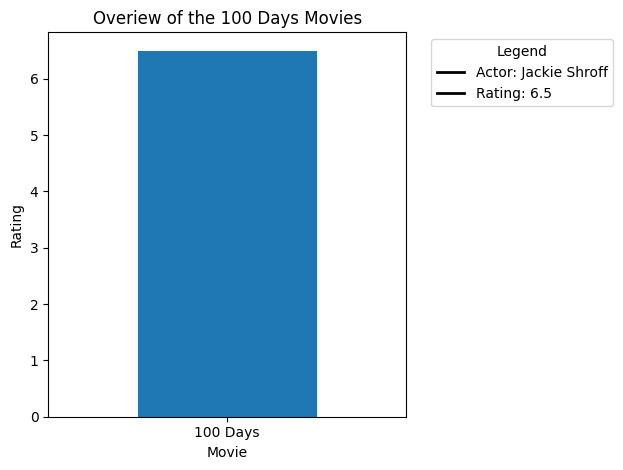

In [18]:
# Filter the DataFrame for movies containing '100 Days'
Movies_Rating = df_movies[df_movies['Name'].str.contains('100 Days')]

# Create a bar chart with actor and rating as labels
plt.figure(figsize=(12, 6))
ax = Movies_Rating.plot(kind='bar', x='Name', y='Rating', rot=0.0, xlabel='Movie', ylabel='Rating')
plt.title('Overiew of the 100 Days Movies')

# Create a custom legend with actor names and votes
unique_actors = Movies_Rating['Actor 1'].unique()
legend_labels = {actor: f'Actor: {actor}' for actor in unique_actors}
Rating = Movies_Rating['Rating'].iloc[0]  
legend_labels['Rating'] = f'Rating: {Rating}'
legend_handles = [plt.Line2D([0], [0], color='k', lw=2, label=legend_labels[label]) for label in legend_labels]
plt.legend(handles=legend_handles, title='Legend', bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

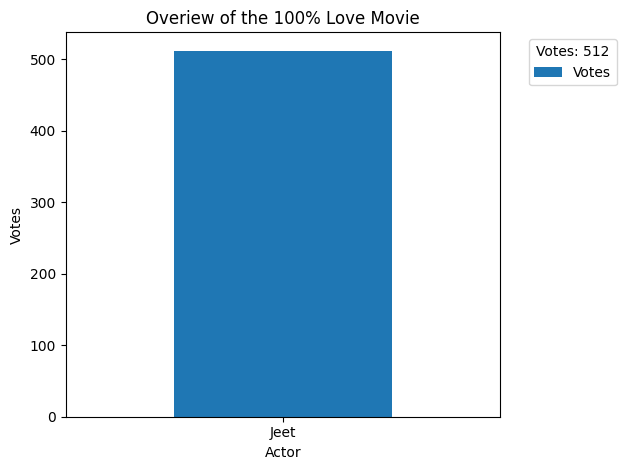

In [19]:
# Filter the DataFrame for the movie '100% Love'
Love100 = df_movies[df_movies['Name'] == '100% Love']
# Get the exact votes for the movie '100% Love'
exact_votes = Love100['Votes'].values[0]

# Create a bar chart with actor and votes as labels
plt.figure(figsize=(8, 4))
ax = Love100.plot(kind='bar', x='Actor 1', y='Votes', rot=0.0, xlabel='Actor', ylabel='Votes')
plt.title('Overiew of the 100% Love Movie')
# Set the legend to display the exact votes
plt.legend(title=f'Votes: {exact_votes}', bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

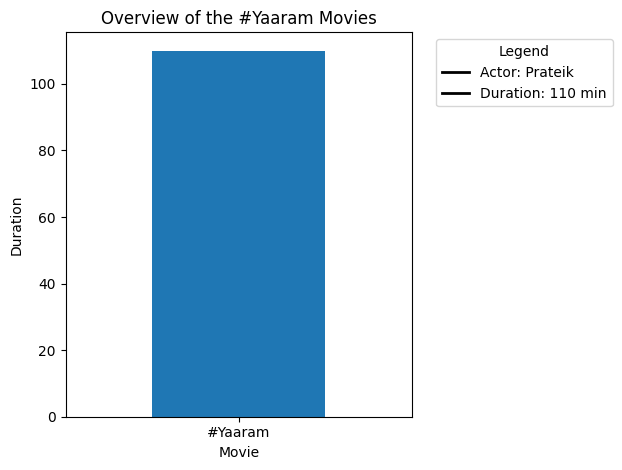

In [20]:
# Filter the DataFrame for movies containing '#Yaaram'
Movies = df_movies[df_movies['Name'].str.contains('#Yaaram')]

# Create a bar chart with actor and duration as labels
plt.figure(figsize=(12, 6))
ax = Movies.plot(kind='bar', x='Name', y='Duration', rot=0.0, xlabel='Movie', ylabel='Duration')
plt.title('Overview of the #Yaaram Movies')

# Create a custom legend with actor names and duration
unique_actors = Movies['Actor 1'].unique()
legend_labels = {actor: f'Actor: {actor}' for actor in unique_actors}
duration = Movies['Duration'].iloc[0]  
legend_labels['Duration'] = f'Duration: {duration} min'
legend_handles = [plt.Line2D([0], [0], color='k', lw=2, label=legend_labels[label]) for label in legend_labels]
plt.legend(handles=legend_handles, title='Legend', bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_7920\2508612831.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_movies['Year'],color='g')
C:\Users\hp\AppData\Local\Temp\ipykernel_7920\2508612831.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_movies['Rating'],color='g')


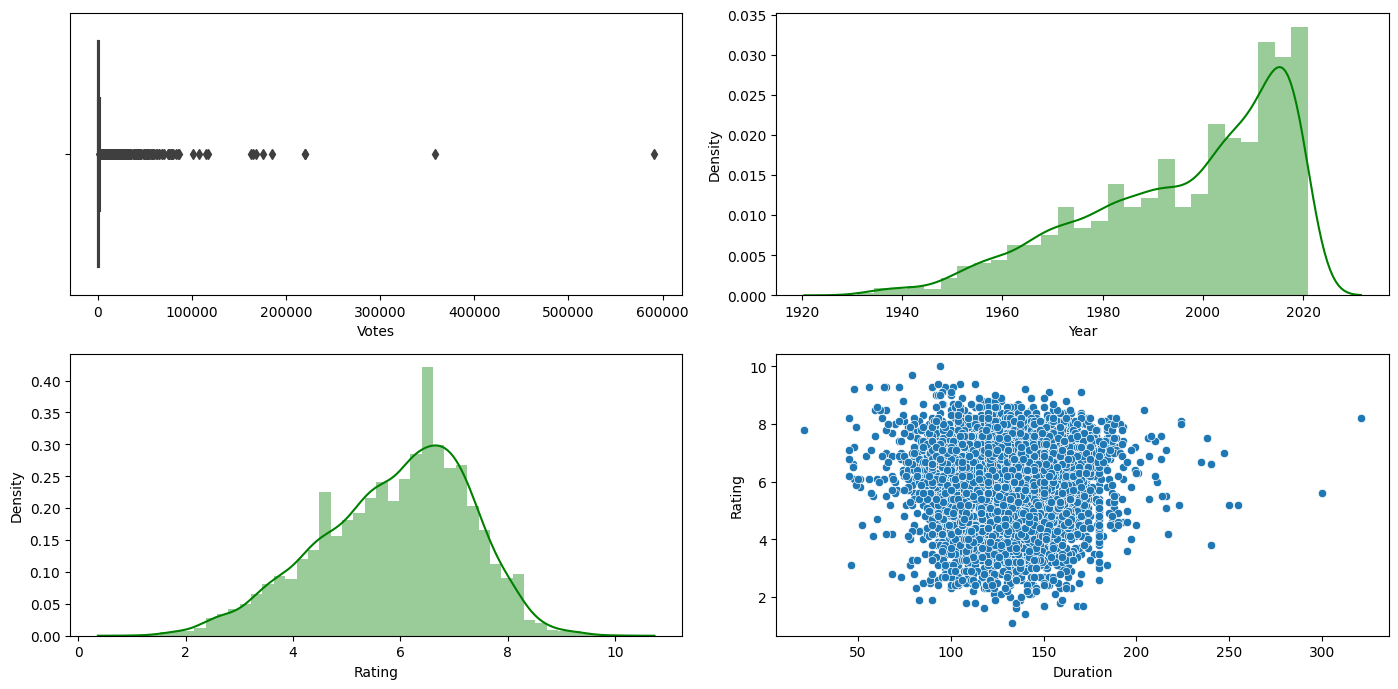

In [21]:
# visualization
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Votes',data=df_movies)

plt.subplot(2,2,2)
sns.distplot(df_movies['Year'],color='g')

plt.subplot(2,2,3)
sns.distplot(df_movies['Rating'],color='g')

plt.subplot(2,2,4)
sns.scatterplot(x=df_movies['Duration'], y=df_movies['Rating'], data=df_movies)

plt.tight_layout()
plt.show()

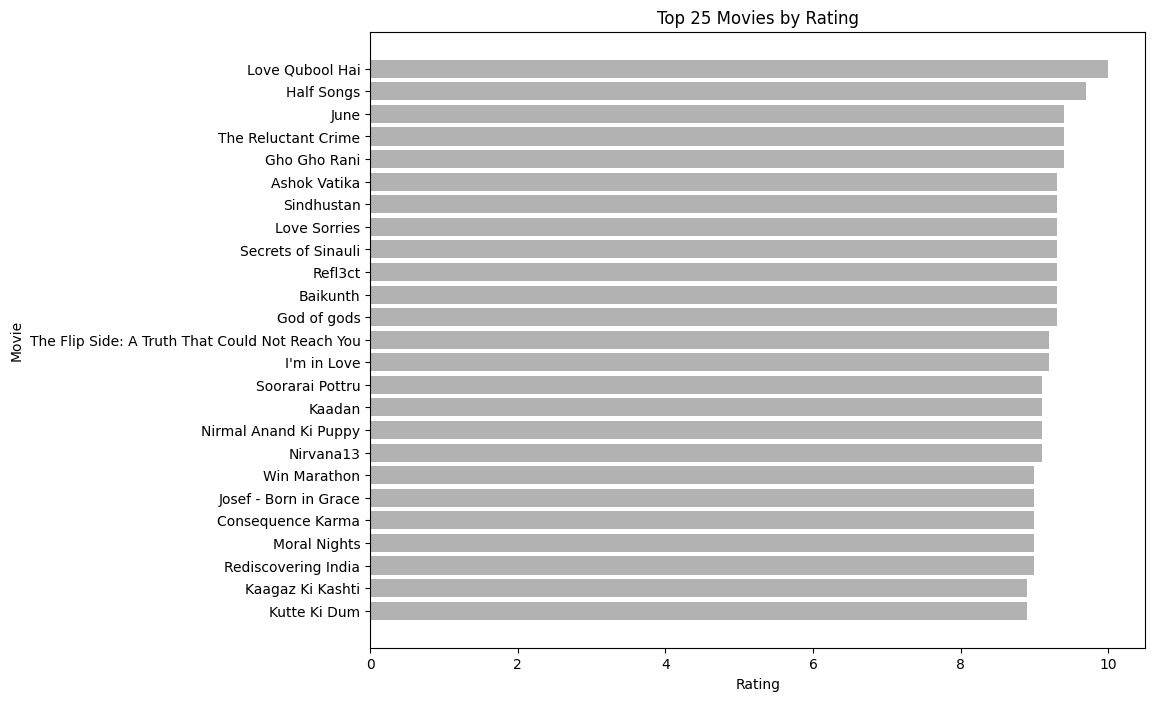

In [22]:
#Find and visualize the top 25 movies by using rating

# Sort the DataFrame by 'Rating' column in descending order
top_25 = df_movies.sort_values(by='Rating', ascending=False).head(25)

# Plot the top 25 movies by rating
plt.figure(figsize=(10, 8))
plt.barh(top_25['Name'], top_25['Rating'], alpha=0.6, color='grey')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 25 Movies by Rating')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest-rated movie at the top
plt.show()


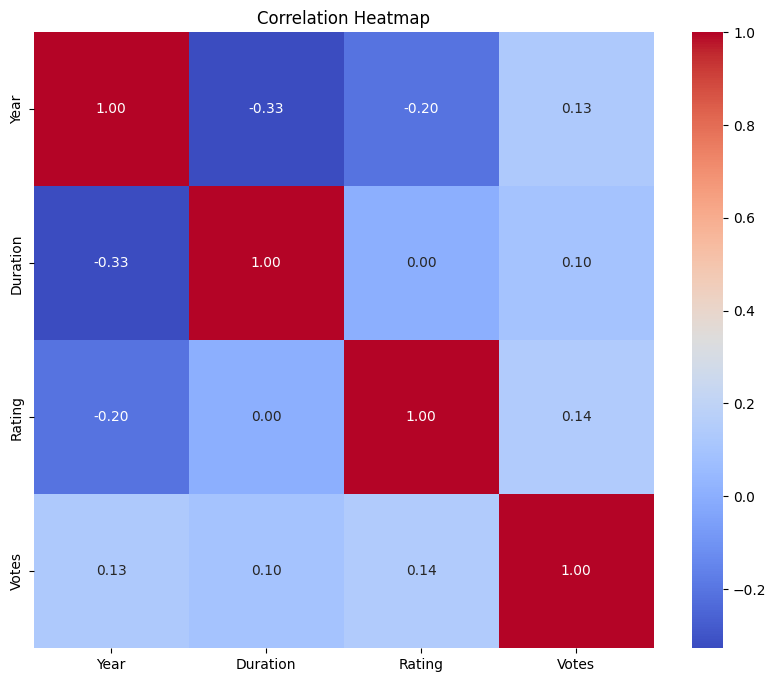

In [23]:
#finding factors/features that affect the rating of a movie

# Calculate the correlation matrix
correlation_matrix = df_movies.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

***Feature Engineering***

In [24]:
df_movies.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)
df_movies.head()

,Year,Duration,Genre,Rating,Votes
1,2019,109,Drama,7.0,8
3,2019,110,"Comedy, Romance",4.4,35
5,1997,147,"Comedy, Drama, Musical",4.7,827
6,2005,142,"Drama, Romance, War",7.4,1086
8,2012,82,"Horror, Mystery, Thriller",5.6,326


In [25]:
X = df_movies[['Year','Duration','Votes']]
y = df_movies['Rating']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1000)

# Model development and training

***Model 1 Pipeline***

In [27]:

# Create a pipeline with standard scaling and SGD regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=10000, random_state=1000))
])

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(max_iter=10000, random_state=1000))])

In [29]:
# Predict ratings on the test set
y_pred_pipeline = pipeline.predict(X_test)

In [30]:
# Evaluation Metrics for the Pipeline
mae_pipeline = mean_absolute_error(y_test, y_pred_pipeline)
mse_pipeline = mean_squared_error(y_test, y_pred_pipeline)
r2_pipeline = r2_score(y_test, y_pred_pipeline)
print("Pipeline Mean Absolute Error:", mae_pipeline)
print("Pipeline Mean Squared Error:", mse_pipeline)
print("Pipeline R-squared:", r2_pipeline)

Pipeline Mean Absolute Error: 1.0727299494168447
Pipeline Mean Squared Error: 1.9386493140405772
Pipeline R-squared: -0.007586682971093772


***Model 2 - Linear Regression model***

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_predict= lr.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 1.7073310281488043
R-squared (R2) Score: 0.0779873705974875


In [32]:
# splitting the dataset into trining and testing data
train, test, train_labels, test_labels = train_test_split(X, y, test_size=0.2)

***Model 3 - Random Forest Regressor model***

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train and train_labels are your feature matrix and target variable for training
# Assuming test and test_labels are your feature matrix and target variable for testing
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train, train_labels)

# Make predictions on the test data
y_pred_rf = rf.predict(test)

# Calculate and print regression metrics (e.g., MSE and R2)
mse = mean_squared_error(test_labels, y_pred_rf)
r2 = r2_score(test_labels, y_pred_rf)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 1.5764096198235669
R-squared (R2) Score: 0.1856373757164015


***Model 4 -KNeighbors Regressor model***

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the KNN regression model
knnr = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knnr.fit(train, train_labels)  # Assuming train and train_labels contain your training data

# Make predictions on the test data
y_pred_knnr = knnr.predict(test)  # Assuming test contains your test data

# Evaluate the model using regression metrics
mse = mean_squared_error(test_labels, y_pred_knnr)
r2 = r2_score(test_labels, y_pred_knnr)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 1.6956809187279152
R-squared (R2) Score: 0.12402262358850635


# As we saw that all our models worked perfectly and the most appropriatte model is model 3rd - Random Forest Classifier model. This prediction is based on the R-squared (R2) Score

# ***Model Deployment***

In [35]:
# Take new user input for prediction
new_input = pd.DataFrame({
    'Year': [2023],          # Replace with the desired year
    'Duration': [180],       # Replace with the desired duration in minutes
    'Votes': [100000],        # Replace with the desired number of votes
})

# Use the trained pipeline to make predictions on the input
predicted_rating1 = pipeline.predict(new_input)

# Use the trained  Random Forest Regressor model to make predictions on the input
predicted_rating2 = rf.predict(new_input)

# Use the trained KNN regression model to make predictions on the input
predicted_rating3 = knnr.predict(new_input)


print("Predicted Rating (pipeline):", predicted_rating1)

print("Predicted Rating (Random Forest Regressor):", predicted_rating2)

print("Predicted Rating (KNN regression model):", predicted_rating3)

Predicted Rating (pipeline): [7.43965648]
Predicted Rating (Random Forest Regressor): [5.561]
Predicted Rating (KNN regression model): [8.32]


As We can seen that KNN regression model is the most appropriatte model for Rating Prediction